# American Express - Default Prediction - Exploratory Data Analysis

Predict if a customer will default in the future

Quick Exploratory Data Analysis for [American Express - Default Prediction](https://www.kaggle.com/competitions/amex-default-prediction/overview) challenge    


<a id="top"></a>

<div class="list-group" id="list-tab" role="tablist">
<h3 class="list-group-item list-group-item-action active" data-toggle="list" style='color:white; background:#8D8F8A; border:0' role="tab" aria-controls="home"><center>Quick Navigation</center></h3>

* [Overview](#1)
* [Visualizations](#2)
* [Modeling](#3)

<a id="1"></a>
<h2 style='background:#8D8F8A; border:0; color:white'><center>Overview<center><h2>

In [2]:
#!pip install seaborn

     |████████████████████████████████| 292 kB 6.2 MB/s eta 0:00:01


In [3]:
import os
import warnings

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn

warnings.filterwarnings('ignore')

In [7]:
TRAIN_DATA_PATH = "./dataset/train_data.csv"
TRAIN_LABELS_PATH = "./dataset/train_labels.csv"

Dataset is so big, that's why we can use chunk loading

In [10]:
chunksize = 13000

train_df_iter = pd.read_csv(TRAIN_DATA_PATH, chunksize=chunksize)
#chunksize : pd.read_csv에 있는 옵션 설정으로, chunksize에 해당하는 row씩 끊어서 읽어옵니다.


In [11]:
train_df_iter

Load only one chunk for EDA With the for loop we can load and process all data

In [12]:
# for chunk in train_df_example:
#     process(chunk)

train_df_example = train_df_iter.__next__()

Labels

In [13]:
train_labels_df = pd.read_csv(TRAIN_LABELS_PATH)

Let's look at one customer

In [14]:
example_customer_id = "000f1c950ae4e388f44e9ba96dd6334dfa85d8be0416d9d0d30228301f2e4cc4"

In [15]:
customer_data_ex = train_df_example[train_df_example["customer_ID"] == example_customer_id]

In [16]:
customer_data_ex

,customer_ID,S_2,P_2,D_39,B_1,B_2,R_1,S_3,D_41,B_3,...,D_136,D_137,D_138,D_139,D_140,D_141,D_142,D_143,D_144,D_145
1182,000f1c950ae4e388f44e9ba96dd6334dfa85d8be0416d9...,2017-03-28,0.418470,0.009963,0.010378,1.000094,0.509781,0.671294,0.002109,0.000512,...,NaN,NaN,NaN,0.001146,0.007715,0.005105,NaN,0.002244,0.002941,0.000962
1183,000f1c950ae4e388f44e9ba96dd6334dfa85d8be0416d9...,2017-04-04,0.433060,0.184160,0.012812,0.818178,0.507807,0.689100,0.004928,0.018017,...,NaN,NaN,NaN,0.000811,0.001906,0.006808,NaN,0.006253,0.007228,0.005207
1184,000f1c950ae4e388f44e9ba96dd6334dfa85d8be0416d9...,2017-05-30,0.520083,0.005440,0.003989,0.817935,0.503176,0.655541,0.005931,0.009068,...,NaN,NaN,NaN,0.006269,0.005597,0.009586,NaN,0.009576,0.001831,0.005110
1185,000f1c950ae4e388f44e9ba96dd6334dfa85d8be0416d9...,2017-06-29,0.542279,0.004294,0.007872,0.810223,0.004904,0.512853,0.005437,0.004967,...,NaN,NaN,NaN,0.005576,0.007637,0.008745,NaN,0.004169,0.002975,0.003384
1186,000f1c950ae4e388f44e9ba96dd6334dfa85d8be0416d9...,2017-07-29,0.792077,0.006405,0.001230,0.815495,0.003561,0.441037,0.008961,0.006305,...,NaN,NaN,NaN,0.001678,0.001722,0.002939,NaN,0.001721,0.000131,0.009941
1187,000f1c950ae4e388f44e9ba96dd6334dfa85d8be0416d9...,2017-08-04,0.763860,0.003278,0.006341,0.812655,0.003979,0.481291,0.005098,0.002396,...,NaN,NaN,NaN,0.006351,0.006931,0.005642,NaN,0.009068,0.001628,0.006462
1188,000f1c950ae4e388f44e9ba96dd6334dfa85d8be0416d9...,2017-09-29,0.688304,0.002574,0.000086,0.814695,0.256973,NaN,0.004261,0.001675,...,NaN,NaN,NaN,0.003987,0.002673,0.005805,NaN,0.007816,0.007045,0.002694
1189,000f1c950ae4e388f44e9ba96dd6334dfa85d8be0416d9...,2017-10-30,0.730735,0.002368,0.005375,0.815030,0.007496,NaN,0.001991,0.003024,...,NaN,NaN,NaN,0.000678,0.001040,0.003076,NaN,0.001464,0.001762,0.006428
1190,000f1c950ae4e388f44e9ba96dd6334dfa85d8be0416d9...,2017-11-04,0.693307,0.000237,0.008908,0.813530,0.004545,NaN,0.002952,0.002034,...,NaN,NaN,NaN,0.000856,0.005488,0.007888,NaN,0.007516,0.002140,0.008065
1191,000f1c950ae4e388f44e9ba96dd6334dfa85d8be0416d9...,2017-12-30,0.741709,0.035695,0.006773,0.812099,0.005131,NaN,0.005485,0.004144,...,NaN,NaN,NaN,0.005811,0.001079,0.004511,NaN,0.005812,0.005347,0.004583


Features are anonymized and normalized, and fall into the following general categories:
- D_* = Delinquency variables   
- S_* = Spend variables   
- P_* = Payment variables   
- B_* = Balance variables   
- R_* = Risk variables   

In [17]:
all_cols = list(customer_data_ex.columns)
print(all_cols)

['customer_ID', 'S_2', 'P_2', 'D_39', 'B_1', 'B_2', 'R_1', 'S_3', 'D_41', 'B_3', 'D_42', 'D_43', 'D_44', 'B_4', 'D_45', 'B_5', 'R_2', 'D_46', 'D_47', 'D_48', 'D_49', 'B_6', 'B_7', 'B_8', 'D_50', 'D_51', 'B_9', 'R_3', 'D_52', 'P_3', 'B_10', 'D_53', 'S_5', 'B_11', 'S_6', 'D_54', 'R_4', 'S_7', 'B_12', 'S_8', 'D_55', 'D_56', 'B_13', 'R_5', 'D_58', 'S_9', 'B_14', 'D_59', 'D_60', 'D_61', 'B_15', 'S_11', 'D_62', 'D_63', 'D_64', 'D_65', 'B_16', 'B_17', 'B_18', 'B_19', 'D_66', 'B_20', 'D_68', 'S_12', 'R_6', 'S_13', 'B_21', 'D_69', 'B_22', 'D_70', 'D_71', 'D_72', 'S_15', 'B_23', 'D_73', 'P_4', 'D_74', 'D_75', 'D_76', 'B_24', 'R_7', 'D_77', 'B_25', 'B_26', 'D_78', 'D_79', 'R_8', 'R_9', 'S_16', 'D_80', 'R_10', 'R_11', 'B_27', 'D_81', 'D_82', 'S_17', 'R_12', 'B_28', 'R_13', 'D_83', 'R_14', 'R_15', 'D_84', 'R_16', 'B_29', 'B_30', 'S_18', 'D_86', 'D_87', 'R_17', 'R_18', 'D_88', 'B_31', 'S_19', 'R_19', 'B_32', 'S_20', 'R_20', 'R_21', 'B_33', 'D_89', 'R_22', 'R_23', 'D_91', 'D_92', 'D_93', 'D_94', 'R_2

In [18]:
b_cols = list(filter(lambda x: x.startswith("B_"), all_cols))
print(b_cols)

['B_1', 'B_2', 'B_3', 'B_4', 'B_5', 'B_6', 'B_7', 'B_8', 'B_9', 'B_10', 'B_11', 'B_12', 'B_13', 'B_14', 'B_15', 'B_16', 'B_17', 'B_18', 'B_19', 'B_20', 'B_21', 'B_22', 'B_23', 'B_24', 'B_25', 'B_26', 'B_27', 'B_28', 'B_29', 'B_30', 'B_31', 'B_32', 'B_33', 'B_36', 'B_37', 'B_38', 'B_39', 'B_40', 'B_41', 'B_42']


Check if the customer will future payment default

In [19]:
train_labels_df[train_labels_df["customer_ID"] == example_customer_id]

,customer_ID,target
98,000f1c950ae4e388f44e9ba96dd6334dfa85d8be0416d9...,1


In [20]:
customer_data_ex.loc[:, "S_2"] = pd.to_datetime(customer_data_ex["S_2"])

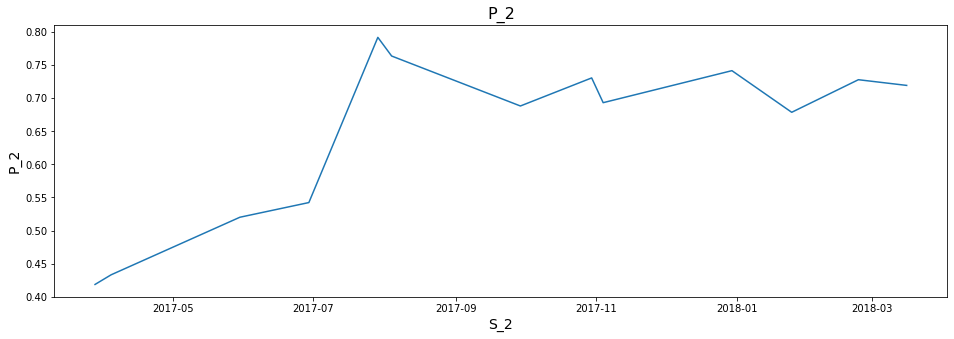

In [21]:
plt.figure(figsize=(16, 5))
sn.lineplot(data=customer_data_ex, x="S_2", y="P_2")
plt.title("P_2", fontsize=16)
plt.xlabel("S_2", fontsize=14)
plt.ylabel("P_2", fontsize=14);

<a id="2"></a>
<h2 style='background:#8D8F8A; border:0; color:white'><center>Visualizations<center><h2>

Show only 10 first customer's

In [22]:
ex_customer_ids = train_labels_df.iloc[:10]["customer_ID"].tolist()
ex_customer_data = train_df_example[train_df_example["customer_ID"].isin(ex_customer_ids)]

In [23]:
ex_customer_data = pd.merge(ex_customer_data, train_labels_df.iloc[:10], on="customer_ID")
ex_customer_data["S_2"] = pd.to_datetime(ex_customer_data["S_2"])

In [24]:
ex_customer_data.head()

,customer_ID,S_2,P_2,D_39,B_1,B_2,R_1,S_3,D_41,B_3,...,D_137,D_138,D_139,D_140,D_141,D_142,D_143,D_144,D_145,target
0,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-03-09,0.938469,0.001733,0.008724,1.006838,0.009228,0.124035,0.008771,0.004709,...,NaN,NaN,0.002427,0.003706,0.003818,NaN,0.000569,0.000610,0.002674,0
1,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-04-07,0.936665,0.005775,0.004923,1.000653,0.006151,0.126750,0.000798,0.002714,...,NaN,NaN,0.003954,0.003167,0.005032,NaN,0.009576,0.005492,0.009217,0
2,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-05-28,0.954180,0.091505,0.021655,1.009672,0.006815,0.123977,0.007598,0.009423,...,NaN,NaN,0.003269,0.007329,0.000427,NaN,0.003429,0.006986,0.002603,0
3,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-06-13,0.960384,0.002455,0.013683,1.002700,0.001373,0.117169,0.000685,0.005531,...,NaN,NaN,0.006117,0.004516,0.003200,NaN,0.008419,0.006527,0.009600,0
4,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-07-16,0.947248,0.002483,0.015193,1.000727,0.007605,0.117325,0.004653,0.009312,...,NaN,NaN,0.003671,0.004946,0.008889,NaN,0.001670,0.008126,0.009827,0


How their feature time series look like

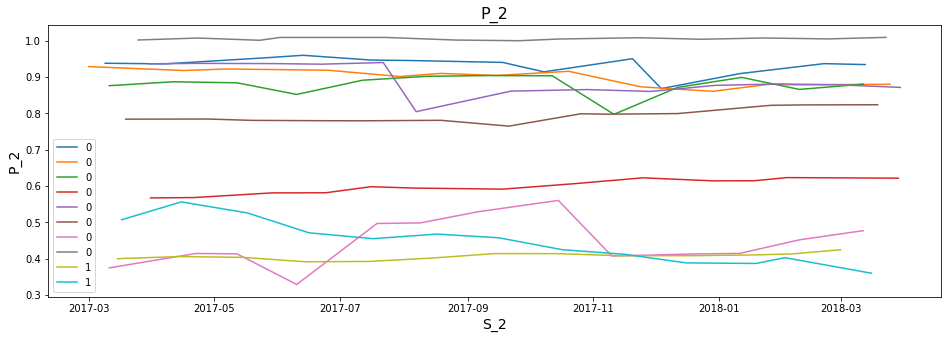

In [25]:
plt.figure(figsize=(16, 5))
for _, group in ex_customer_data.groupby("customer_ID"):
    sn.lineplot(data=group, x="S_2", y="P_2", label=group["target"].max())
plt.title("P_2", fontsize=16)
plt.xlabel("S_2", fontsize=14)
plt.ylabel("P_2", fontsize=14);

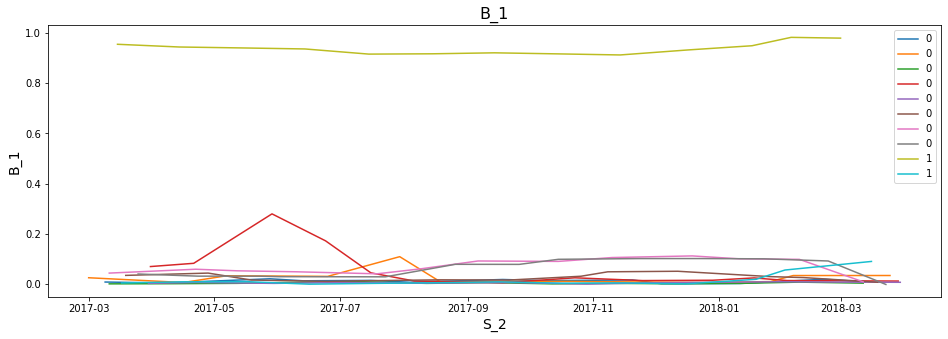

In [26]:
plt.figure(figsize=(16, 5))
for _, group in ex_customer_data.groupby("customer_ID"):
    sn.lineplot(data=group, x="S_2", y="B_1", label=group["target"].max())
plt.title("B_1", fontsize=16)
plt.xlabel("S_2", fontsize=14)
plt.ylabel("B_1", fontsize=14);

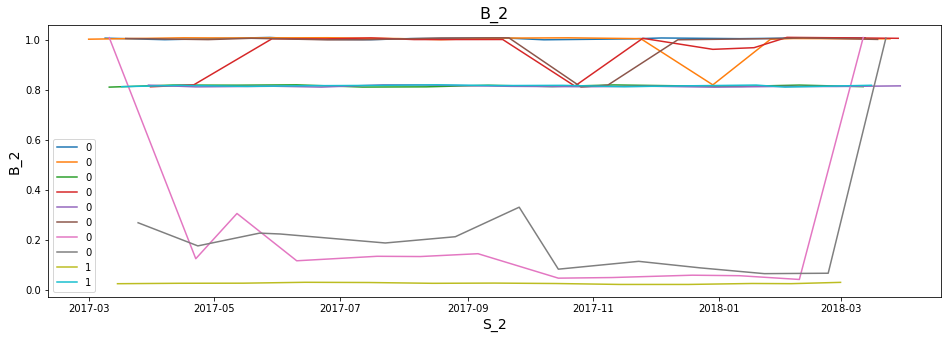

In [27]:
plt.figure(figsize=(16, 5))
for _, group in ex_customer_data.groupby("customer_ID"):
    sn.lineplot(data=group, x="S_2", y="B_2", label=group["target"].max())
plt.title("B_2", fontsize=16)
plt.xlabel("S_2", fontsize=14)
plt.ylabel("B_2", fontsize=14);

Let's take 1000 customers and show features histograms for target customers and for no-target

In [20]:
ex_customer_ids = train_labels_df.iloc[:1000]["customer_ID"].tolist()
ex_customer_data = train_df_example[train_df_example["customer_ID"].isin(ex_customer_ids)]
ex_customer_data = pd.merge(ex_customer_data, train_labels_df.iloc[:1000], on="customer_ID")
ex_customer_data["S_2"] = pd.to_datetime(ex_customer_data["S_2"])

ex_customer_data.shape

(12062, 191)

We have 735 no-target customers and 265 target

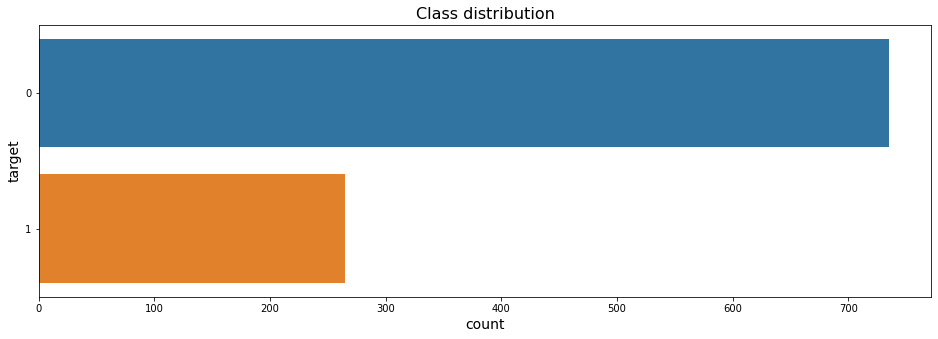

In [21]:
plt.figure(figsize=(16, 5))
sn.countplot(y=ex_customer_data.groupby("customer_ID")["target"].max())
plt.title("Class distribution", fontsize=16)
plt.xlabel("count", fontsize=14)
plt.ylabel("target", fontsize=14);

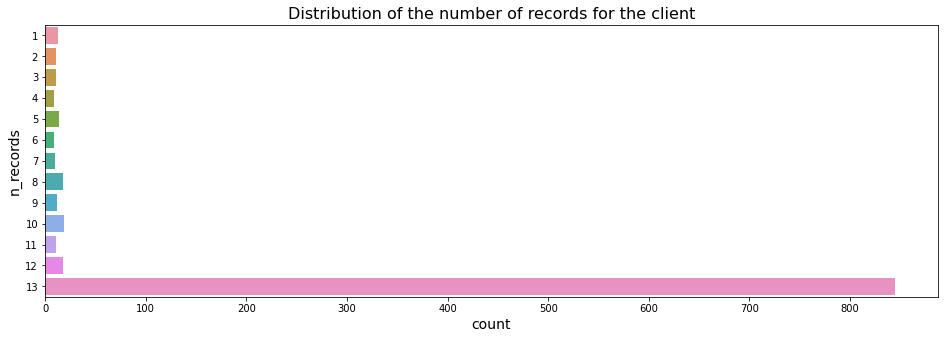

In [22]:
plt.figure(figsize=(16, 5))
sn.countplot(y=ex_customer_data.groupby("customer_ID")["target"].count())
plt.title("Distribution of the number of records for the client", fontsize=16)
plt.xlabel("count", fontsize=14)
plt.ylabel("n_records", fontsize=14);

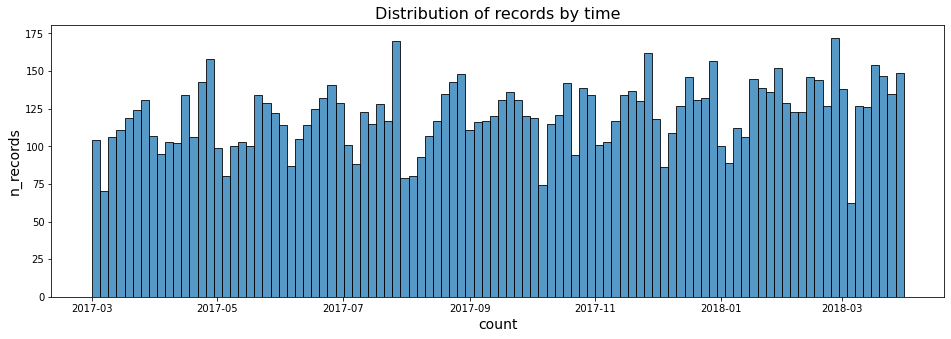

In [23]:
plt.figure(figsize=(16, 5))
sn.histplot(data=ex_customer_data, x="S_2", bins=100)
plt.title("Distribution of records by time", fontsize=16)
plt.xlabel("count", fontsize=14)
plt.ylabel("n_records", fontsize=14);

In [24]:
def sort_f(x):
    try:
        a, b = x.split("_")
        return a, int(b)
    except:
        return "0", 0

all_cols = sorted(all_cols, key=sort_f)

In [25]:
categorical_cols = [
    'B_30', 'B_38', 'D_114', 'D_116', 'D_117', 'D_120', 
    'D_126', 'D_63', 'D_64', 'D_66', 'D_68',
]

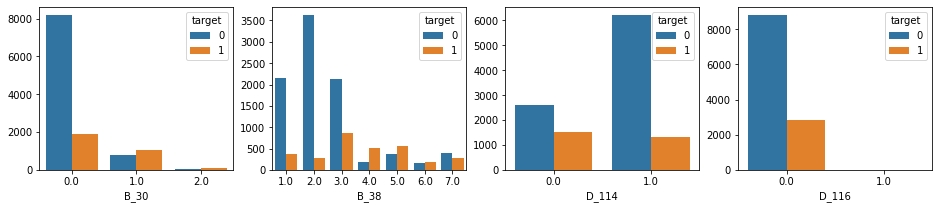

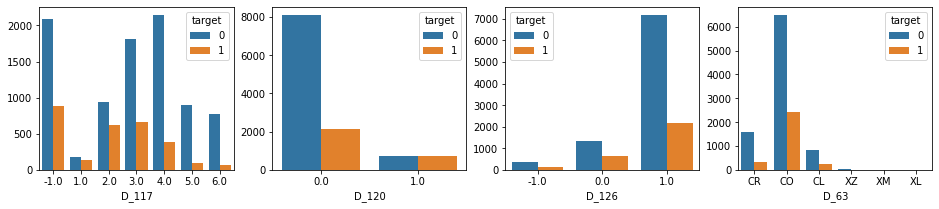

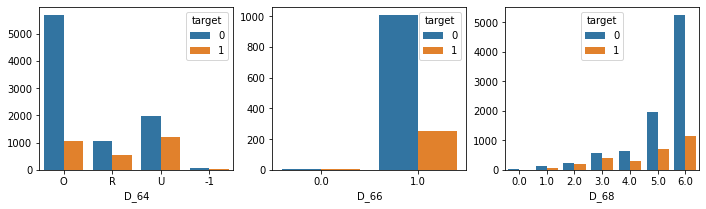

In [26]:
ind = 0
for col in categorical_cols:
    if ind % 4 == 0:
        plt.figure(figsize=(16, 3))
    plt.subplot(1, 4, ind % 4 + 1)
    
    sn.countplot(data=ex_customer_data, x=col, hue="target")
    plt.ylabel("")
    
    if ind % 4 == 3:
        plt.show()
    
    ind += 1

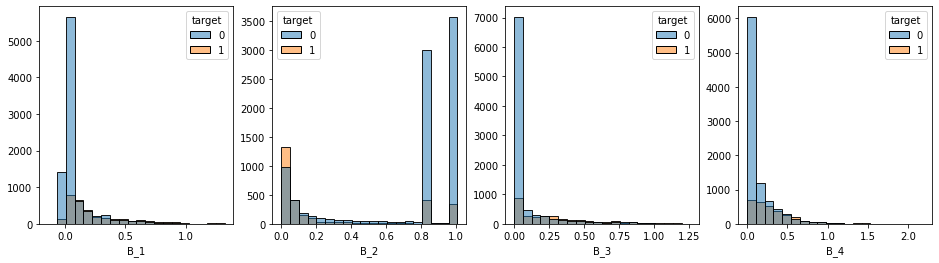

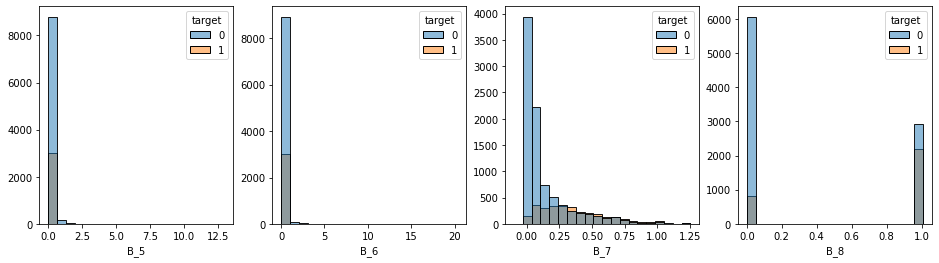

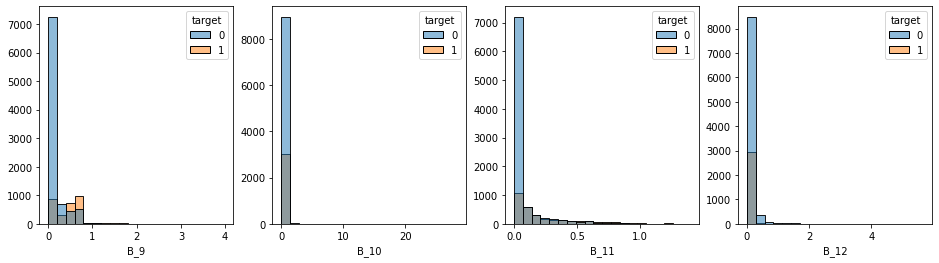

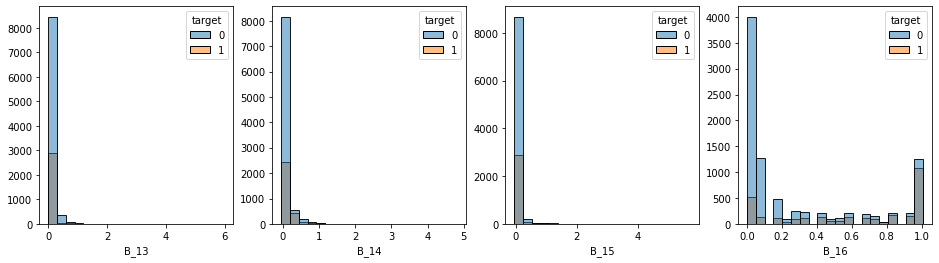

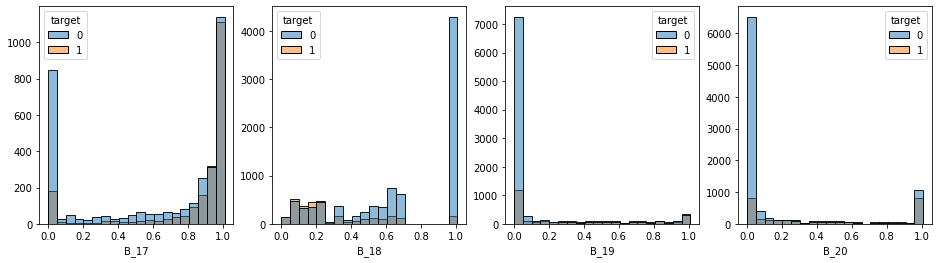

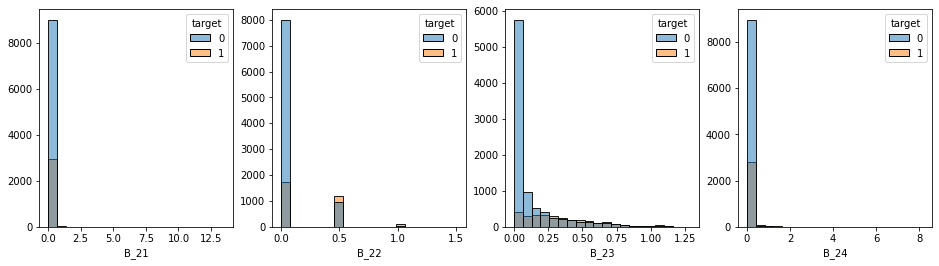

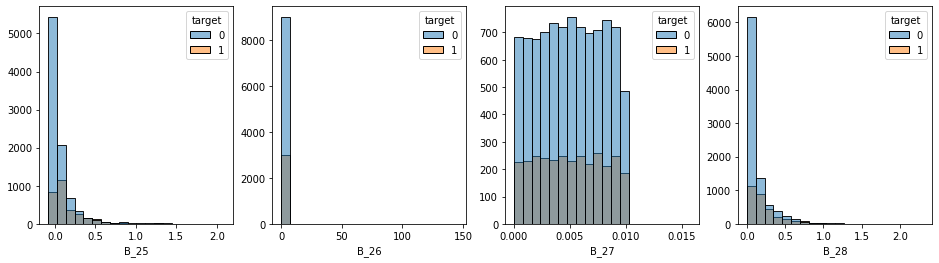

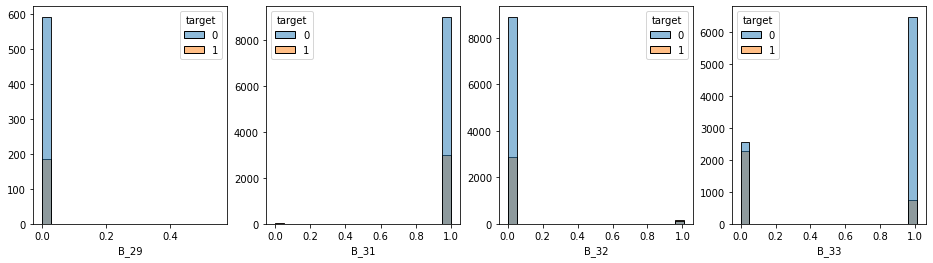

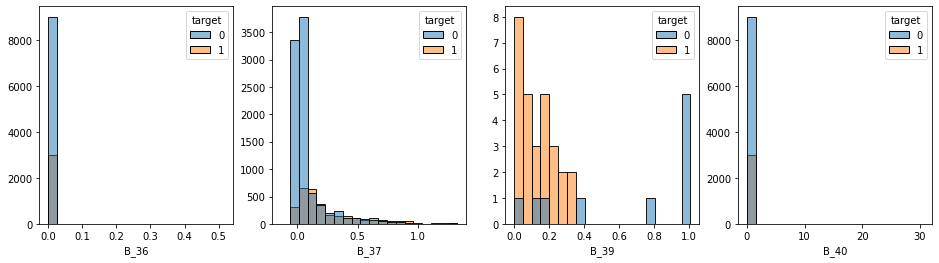

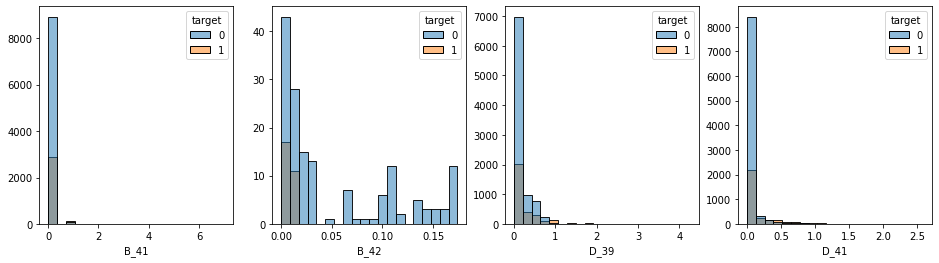

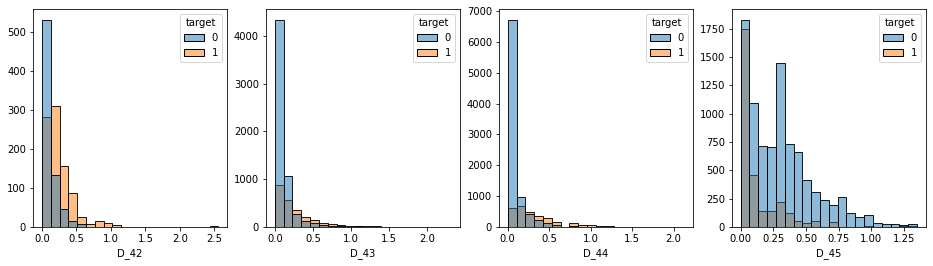

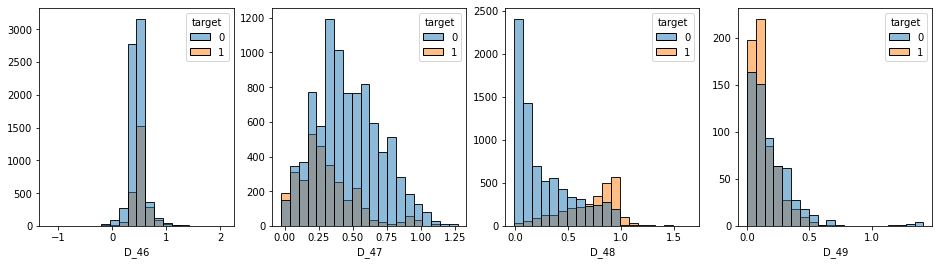

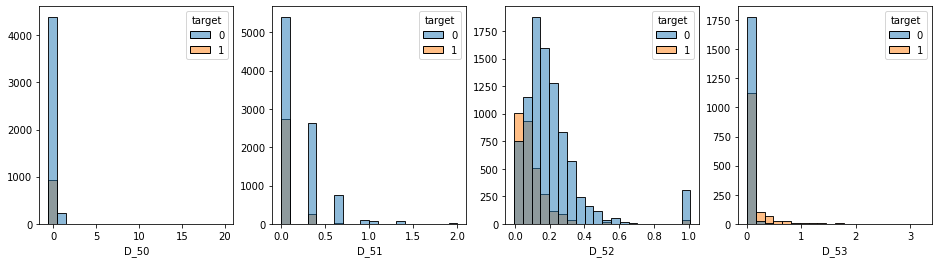

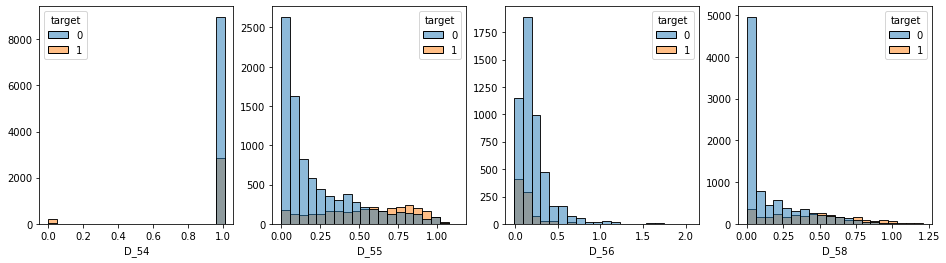

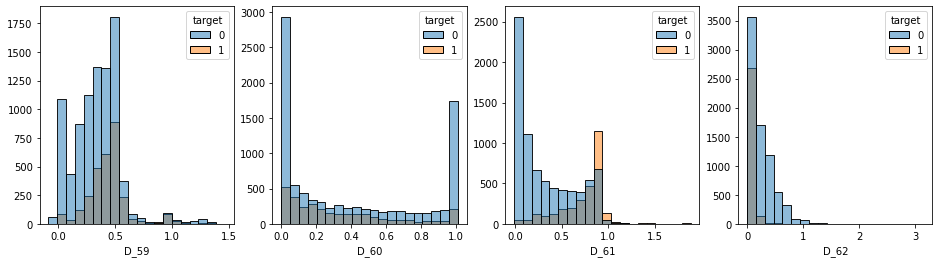

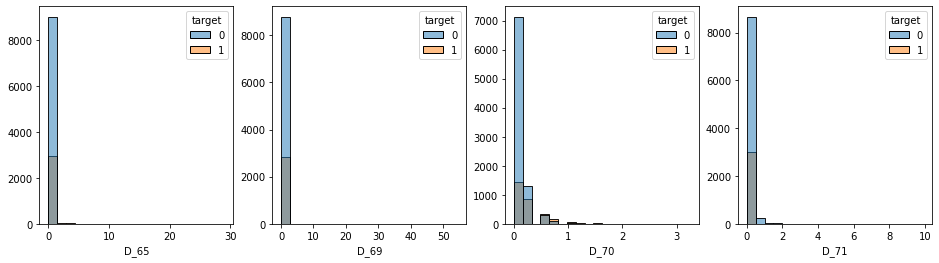

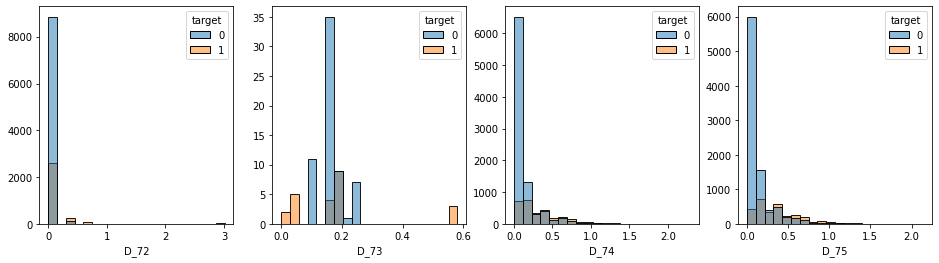

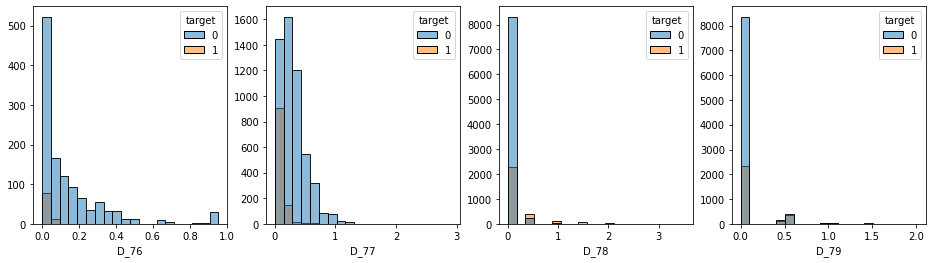

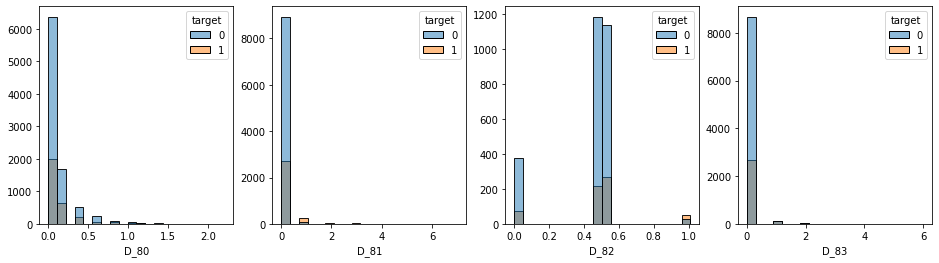

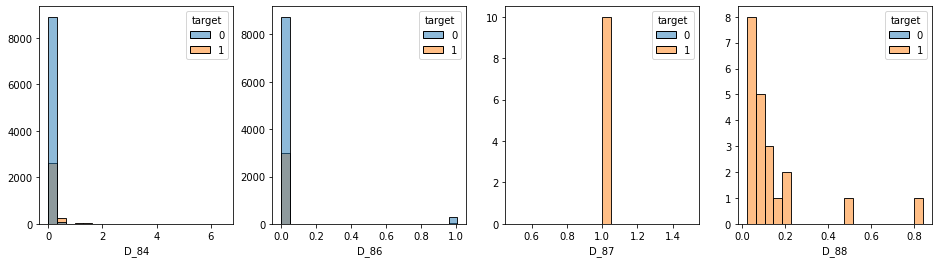

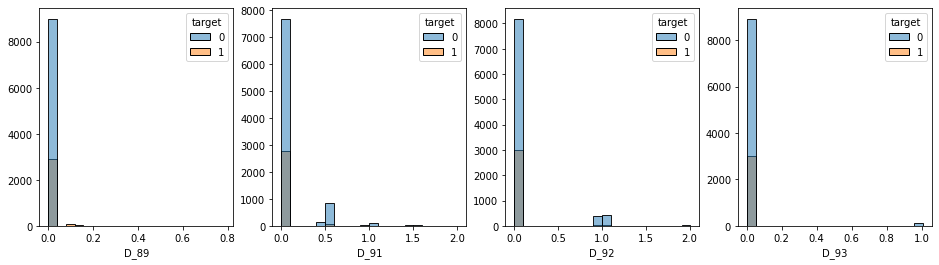

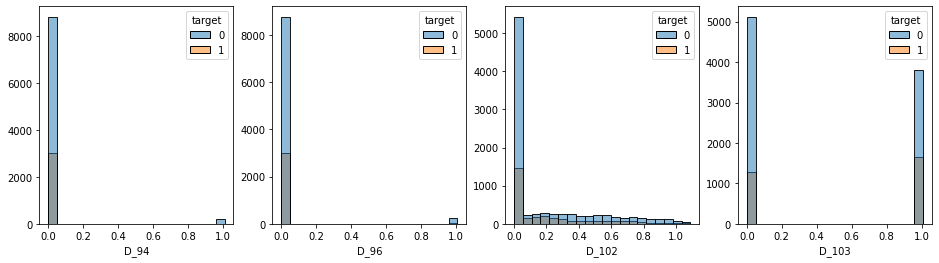

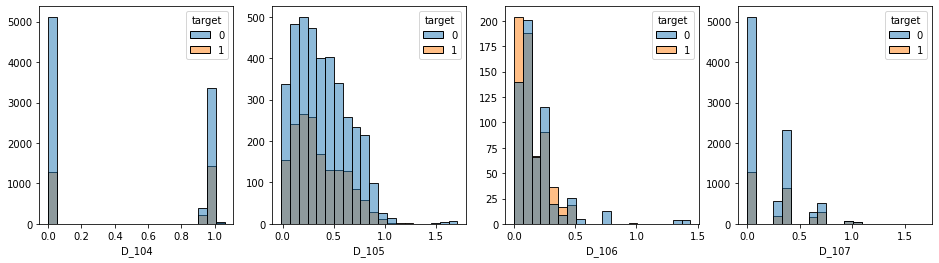

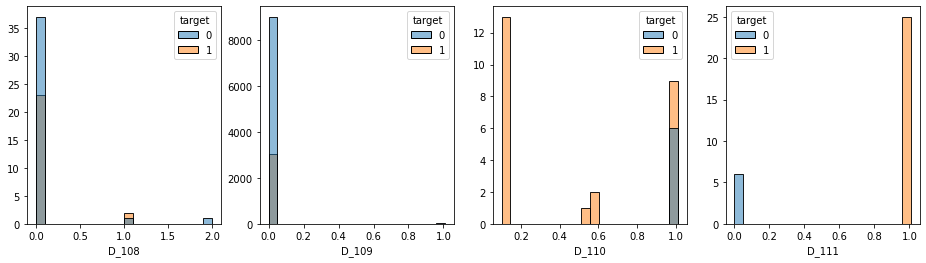

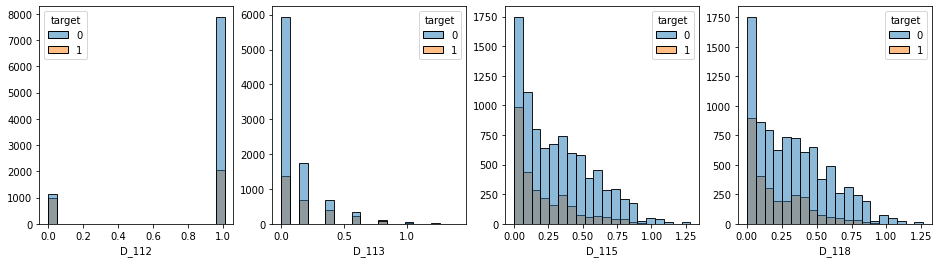

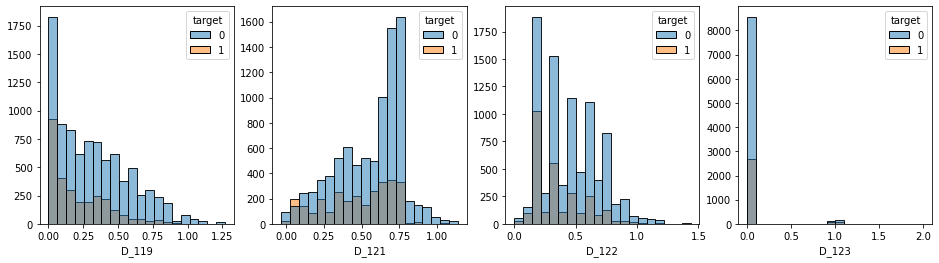

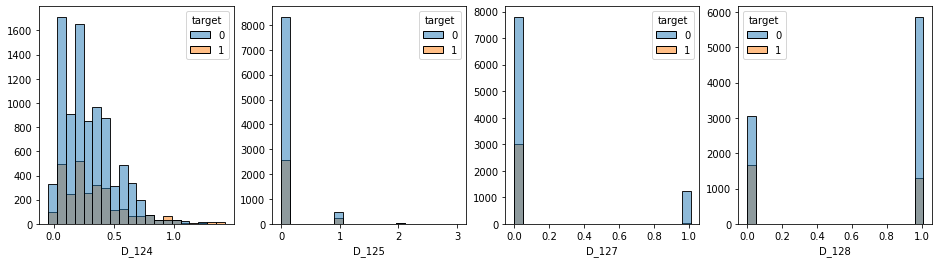

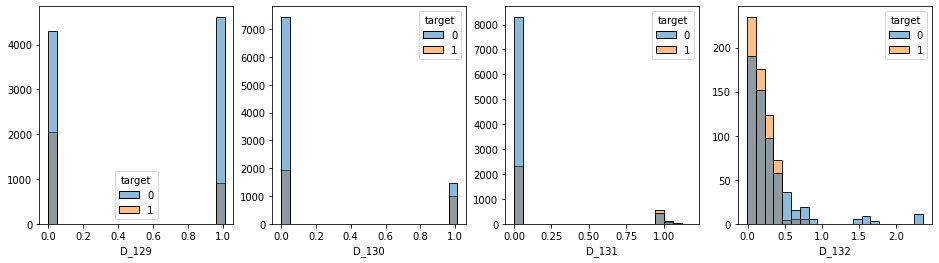

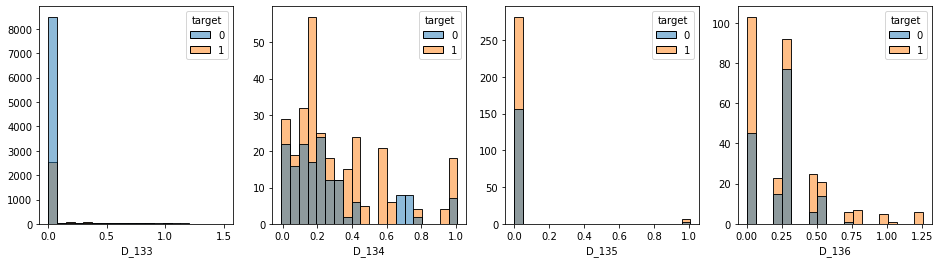

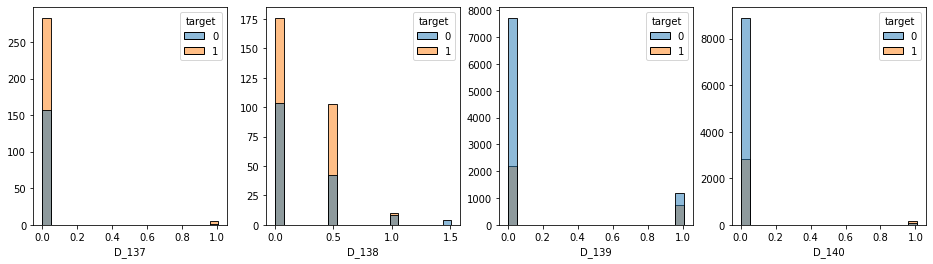

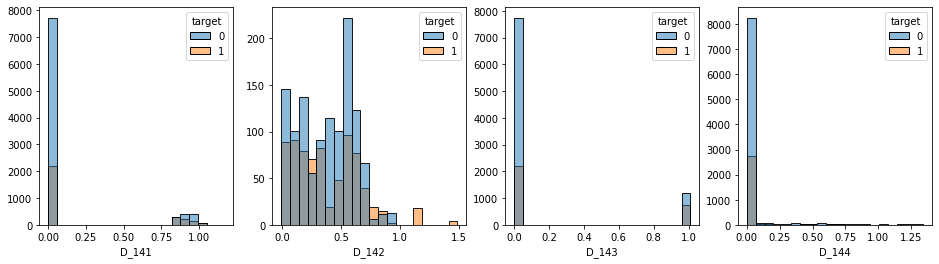

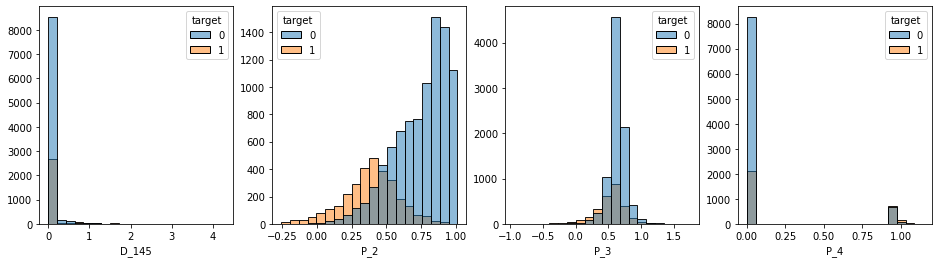

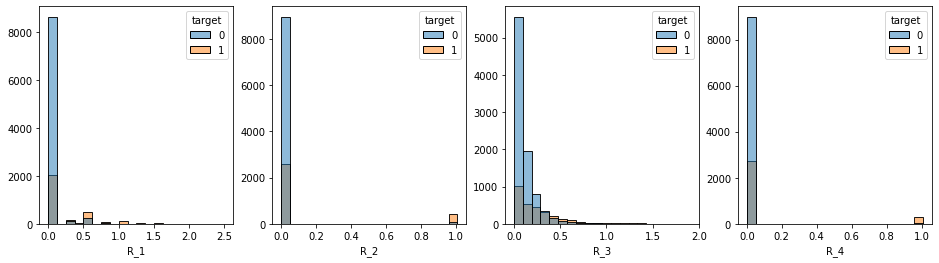

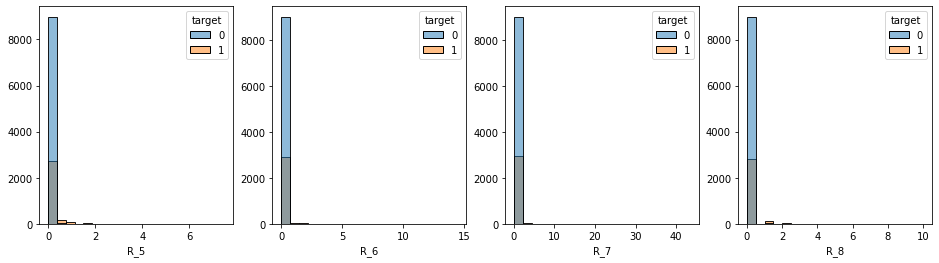

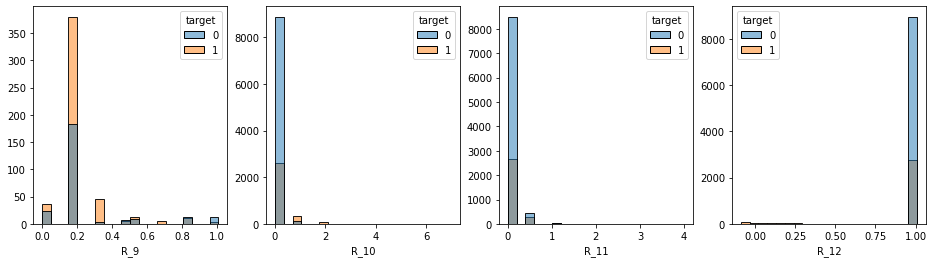

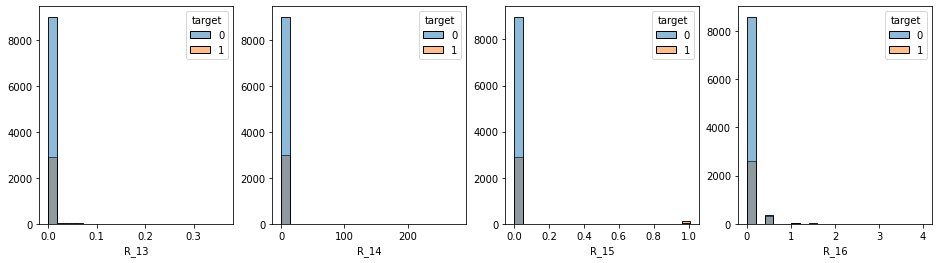

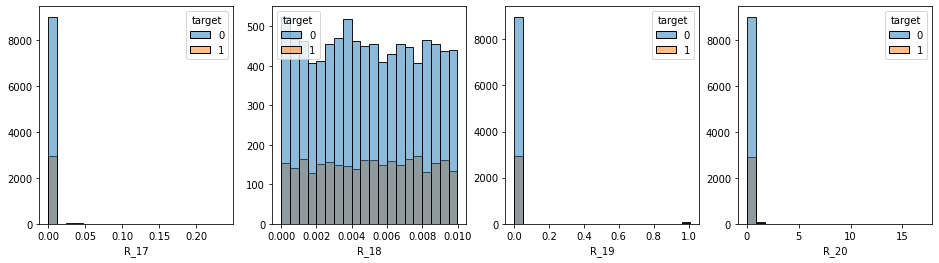

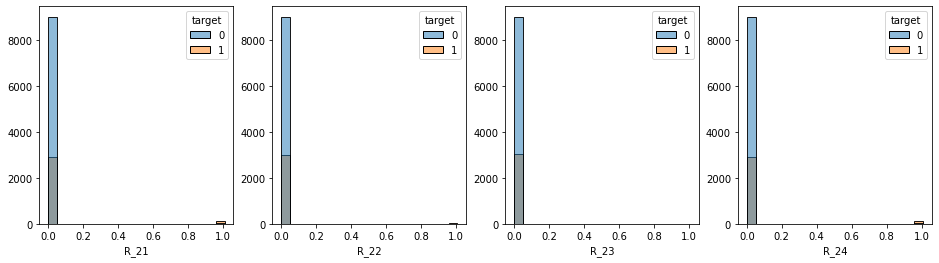

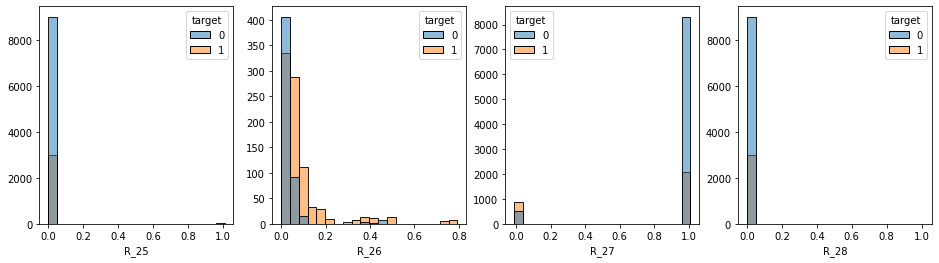

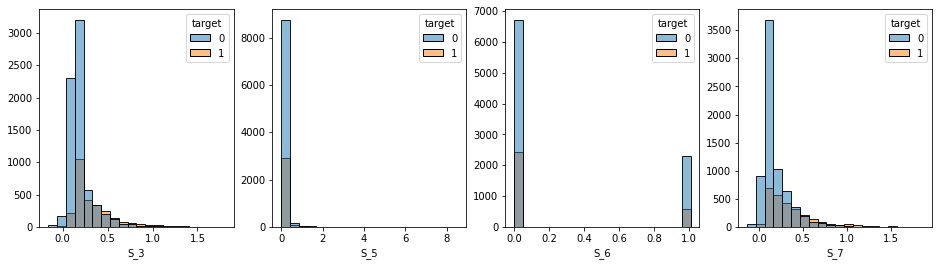

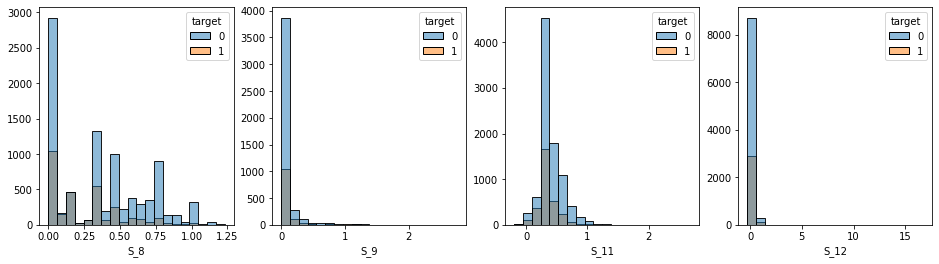

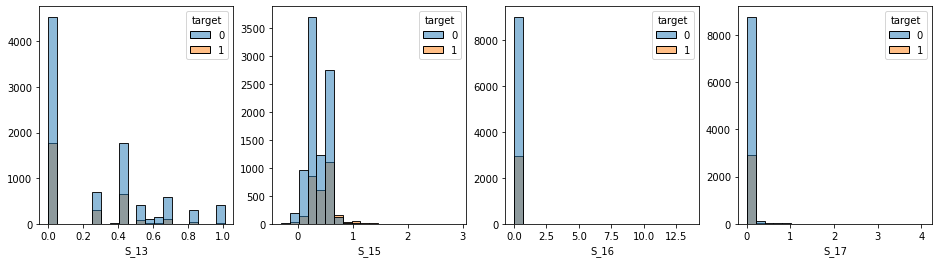

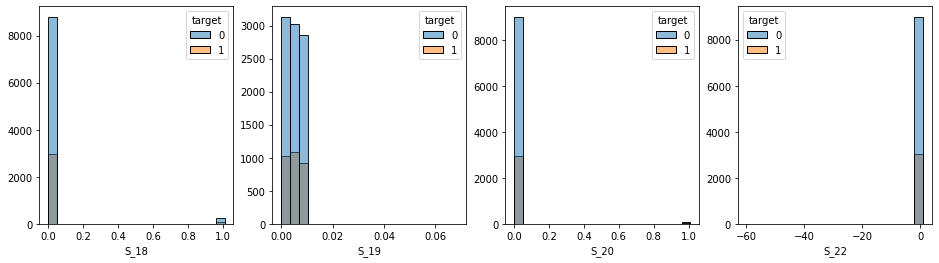

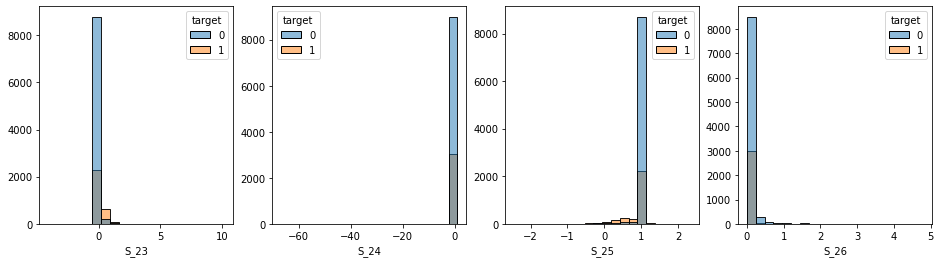

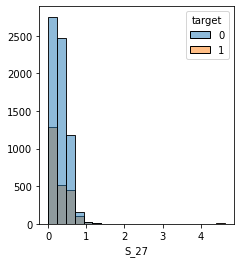

In [27]:
ind = 0
for col in all_cols:
    if col in ["S_2", "customer_ID", "target"] + categorical_cols:
        continue
    
    if ind % 4 == 0:
        plt.figure(figsize=(16, 4))
    plt.subplot(1, 4, ind % 4 + 1)
    
    sn.histplot(data=ex_customer_data, x=col, hue="target", bins=20)
    plt.ylabel("")
    
    if ind % 4 == 3:
        plt.show()
    
    ind += 1

In [28]:
ex_customer_data[ex_customer_data["target"] == 0][b_cols[:10]].describe()

,B_1,B_2,B_3,B_4,B_5,B_6,B_7,B_8,B_9,B_10
count,9032.000000,9032.000000,9032.000000,9032.000000,9032.000000,9032.000000,9032.000000,8.989000e+03,9032.000000,9032.000000
mean,0.081276,0.719796,0.081671,0.130928,0.097953,0.161655,0.133657,3.310980e-01,0.119310,0.235404
std,0.156970,0.355266,0.181874,0.182206,0.331847,0.319970,0.192023,4.688353e-01,0.219119,0.811087
min,-0.141469,0.000184,0.000003,0.000017,0.000007,-0.000552,-0.096913,2.764867e-07,0.000001,-0.002939
25%,0.007554,0.620152,0.004455,0.019144,0.007463,0.037204,0.024911,3.603379e-03,0.005046,0.047373
50%,0.021453,0.817121,0.008435,0.055663,0.017671,0.140455,0.045870,7.330273e-03,0.009655,0.238163
75%,0.061725,1.003689,0.041836,0.161069,0.072235,0.199933,0.156390,1.002241e+00,0.118648,0.297679
max,1.320823,1.009999,1.171260,1.283849,12.974426,20.331217,1.252293,1.010181e+00,3.987410,28.405558


In [29]:
ex_customer_data[ex_customer_data["target"] == 1][b_cols[:10]].describe()

,B_1,B_2,B_3,B_4,B_5,B_6,B_7,B_8,B_9,B_10
count,3030.000000,3030.000000,3030.000000,3030.000000,3030.000000,3030.000000,3030.000000,3022.000000,3030.000000,3030.000000
mean,0.257518,0.299894,0.298945,0.328520,0.031458,0.043737,0.355820,0.734537,0.436985,0.060799
std,0.279484,0.375638,0.300259,0.296676,0.084002,0.085808,0.252973,0.444182,0.325181,0.119609
min,-0.046796,0.000034,0.000085,0.000082,0.000006,-0.002122,0.000510,0.000006,0.000077,-0.002880
25%,0.054462,0.028687,0.036761,0.120258,0.007023,0.009662,0.159904,0.009335,0.126157,0.015058
50%,0.136546,0.066485,0.220646,0.251262,0.011993,0.017531,0.309124,1.003016,0.525351,0.027238
75%,0.378923,0.810611,0.455126,0.450153,0.023515,0.038585,0.510301,1.006530,0.632523,0.054261
max,1.323411,1.009960,1.258546,2.187350,2.188328,1.926984,1.252394,1.010065,2.488489,2.666609


<a id="3"></a>
<h2 style='background:#8D8F8A; border:0; color:white'><center>Modeling<center><h2>

Select baseline features based on the graps above

In [30]:
X_cols = [
    "B_2", "B_7", "B_18", "B_23", "B_32", "D_48",
    "D_55", "D_61", "D_121", "P_2", "S_11",
    
]

Take a small portion of train data for train baseline

In [31]:
chunksize = 1000000

train_df_iter = pd.read_csv(TRAIN_DATA_PATH, chunksize=chunksize, usecols=["customer_ID"] + X_cols)

train_df = train_df_iter.__next__()

Create mean and last values for selected features

In [32]:
train_df_mean = train_df.groupby("customer_ID")[X_cols].mean().reset_index()
train_df_last = train_df.groupby("customer_ID")[X_cols].last().reset_index()

In [33]:
train_df = pd.merge(
    left=train_df_mean, 
    right=train_df_last, 
    how="inner",
    on="customer_ID",
    suffixes=("_mean", "_last"),
)

In [34]:
train_df = pd.merge(train_df, train_labels_df, on="customer_ID", how="left")

Hard fillna. We need to recheck this

In [35]:
train_df = train_df.fillna(0)

In [36]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score

In [37]:
_X_cols = train_df.columns[1:-1]

In [38]:
X_train, X_valid, y_train, y_valid = train_test_split(
    train_df[_X_cols], train_df["target"], test_size=0.2, 
    random_state=42, stratify=train_df["target"],
)

X_train.shape, X_valid.shape, y_train.shape, y_valid.shape

((66380, 22), (16595, 22), (66380,), (16595,))

Train random forest model and select the best hyperparameters

In [39]:
parameters = {
    "n_estimators": [5, 50], 
    "max_depth": [3, 5],
}

model = RandomForestClassifier(
    random_state=42,
    class_weight="balanced",
)

model = GridSearchCV(
    model, 
    parameters, 
    cv=5,
    scoring="f1",
)

In [40]:
model.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(class_weight='balanced',
                                              random_state=42),
             param_grid={'max_depth': [3, 5], 'n_estimators': [5, 50]},
             scoring='f1')

In [41]:
model.best_estimator_

RandomForestClassifier(class_weight='balanced', max_depth=5, n_estimators=50,
                       random_state=42)

See the best features

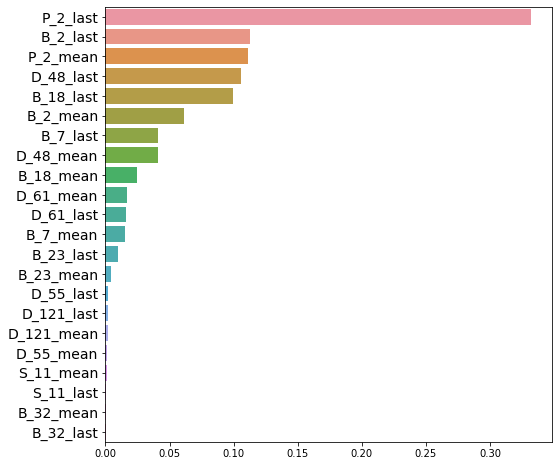

In [42]:
feature_importances = model.best_estimator_.feature_importances_
vis_indexes = list(range(len(feature_importances)))
vis_indexes = sorted(vis_indexes, key=lambda x: -feature_importances[x])
plt.figure(figsize=(8, 8))
sn.barplot(
    x=feature_importances[vis_indexes], 
    y=_X_cols[vis_indexes],
)
plt.yticks(fontsize=14);

https://www.kaggle.com/code/inversion/amex-competition-metric-python

In [43]:
def amex_metric(y_true: pd.DataFrame, y_pred: pd.DataFrame) -> float:

    def top_four_percent_captured(y_true: pd.DataFrame, y_pred: pd.DataFrame) -> float:
        df = (pd.concat([y_true, y_pred], axis='columns')
              .sort_values('prediction', ascending=False))
        df['weight'] = df['target'].apply(lambda x: 20 if x==0 else 1)
        four_pct_cutoff = int(0.04 * df['weight'].sum())
        df['weight_cumsum'] = df['weight'].cumsum()
        df_cutoff = df.loc[df['weight_cumsum'] <= four_pct_cutoff]
        return (df_cutoff['target'] == 1).sum() / (df['target'] == 1).sum()
        
    def weighted_gini(y_true: pd.DataFrame, y_pred: pd.DataFrame) -> float:
        df = (pd.concat([y_true, y_pred], axis='columns')
              .sort_values('prediction', ascending=False))
        df['weight'] = df['target'].apply(lambda x: 20 if x==0 else 1)
        df['random'] = (df['weight'] / df['weight'].sum()).cumsum()
        total_pos = (df['target'] * df['weight']).sum()
        df['cum_pos_found'] = (df['target'] * df['weight']).cumsum()
        df['lorentz'] = df['cum_pos_found'] / total_pos
        df['gini'] = (df['lorentz'] - df['random']) * df['weight']
        return df['gini'].sum()

    def normalized_weighted_gini(y_true: pd.DataFrame, y_pred: pd.DataFrame) -> float:
        y_true_pred = y_true.rename(columns={'target': 'prediction'})
        return weighted_gini(y_true, y_pred) / weighted_gini(y_true, y_true_pred)

    g = normalized_weighted_gini(y_true, y_pred)
    d = top_four_percent_captured(y_true, y_pred)

    return 0.5 * (g + d)

Check train metrics

In [44]:
y_pred_train = model.predict_proba(X_train)[:, 1]
f1_score(y_train, y_pred_train >= 0.5)

0.7531173258946666

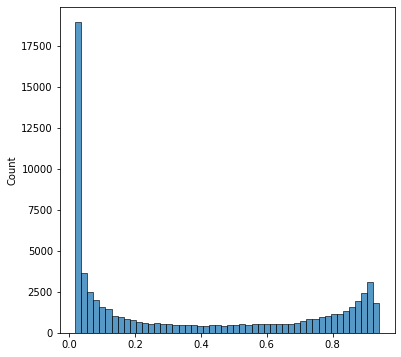

In [45]:
plt.figure(figsize=(6, 6))
sn.histplot(x=y_pred_train, bins=50);

In [46]:
amex_metric(
    pd.DataFrame({"target": y_train}).reset_index(drop=True), 
    pd.DataFrame({"prediction": y_pred_train}).reset_index(drop=True),
)

0.674711225338

Check valid metrics

In [47]:
y_pred_valid = model.predict_proba(X_valid)[:, 1]
f1_score(y_valid, y_pred_valid >= 0.5)

0.7453027139874739

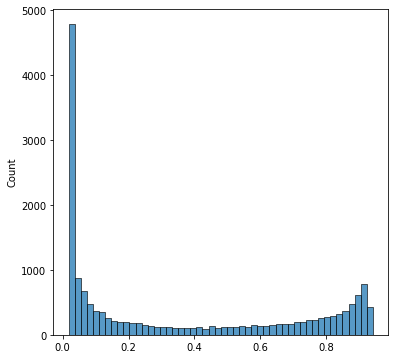

In [48]:
plt.figure(figsize=(6, 6))
sn.histplot(x=y_pred_valid, bins=50);

In [49]:
amex_metric(
    pd.DataFrame({"target": y_valid}).reset_index(drop=True), 
    pd.DataFrame({"prediction": y_pred_valid}).reset_index(drop=True),
)

0.6590613483123302

In [50]:
TEST_DATA_PATH = "../input/amex-default-prediction/test_data.csv"
SAMPLE_SUBMISSION_PATH = "../input/amex-default-prediction/sample_submission.csv"

In [51]:
sample_submission_df = pd.read_csv(SAMPLE_SUBMISSION_PATH)

In [52]:
chunksize = 1000000

test_df_iter = pd.read_csv(TEST_DATA_PATH, chunksize=chunksize, usecols=["customer_ID"] + X_cols)

Iterate over chunks of test data and make predictions for them

In [53]:
_index = []
_vals = []

for chunk in test_df_iter:
    _chunk_mean = chunk.groupby("customer_ID")[X_cols].mean().reset_index()
    _chunk_last = chunk.groupby("customer_ID")[X_cols].last().reset_index()
    _chunk = pd.merge(
        left=_chunk_mean, 
        right=_chunk_last, 
        how="inner",
        on="customer_ID",
        suffixes=("_mean", "_last"),
    )

    X_test = _chunk[_X_cols]
    X_test = X_test.fillna(0)
    y_test_pred = model.predict_proba(X_test)[:, 1]
    _index.extend(_chunk["customer_ID"])
    _vals.extend(y_test_pred)
    
    print(len(_index))

81358
162618
244059
325450
406815
488260
569555
650904
732217
813543
895040
924631


In [54]:
res_df = pd.DataFrame(
    {"customer_ID": _index, "prediction": _vals}
).groupby("customer_ID")["prediction"].mean().reset_index()

In [55]:
res_df.isna().sum()

customer_ID    0
prediction     0
dtype: int64

See test distribution of predictions

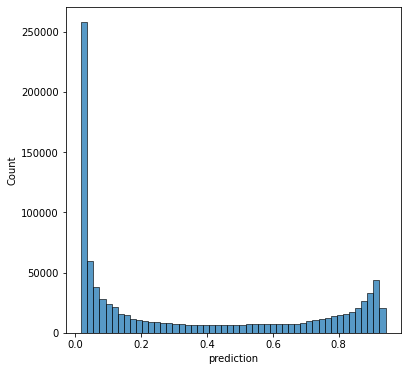

In [56]:
plt.figure(figsize=(6, 6))
sn.histplot(data=res_df, x="prediction", bins=50);

In [57]:
res_df.to_csv("submission.csv", index=False)

In [58]:
res_df

,customer_ID,prediction
0,00000469ba478561f23a92a868bd366de6f6527a684c9a...,0.466372
1,00001bf2e77ff879fab36aa4fac689b9ba411dae63ae39...,0.017823
2,0000210045da4f81e5f122c6bde5c2a617d03eef67f82c...,0.110814
3,00003b41e58ede33b8daf61ab56d9952f17c9ad1c3976c...,0.757556
4,00004b22eaeeeb0ec976890c1d9bfc14fd9427e98c4ee9...,0.907241
...,...,...
924616,ffff952c631f2c911b8a2a8ca56ea6e656309a83d2f64c...,0.202711
924617,ffffcf5df59e5e0bba2a5ac4578a34e2b5aa64a1546cd3...,0.819343
924618,ffffd61f098cc056dbd7d2a21380c4804bbfe60856f475...,0.679800
924619,ffffddef1fc3643ea179c93245b68dca0f36941cd83977...,0.700156
